In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from Src.Entities.AprioriRule import apriori_for_game_object
from Src.Entities.DataVisualization import visualize_model
from Src.Entities.EvaluationMeasures import evaluate_normal_cumulative_gain
from Src.Entities.RuleParameters import RuleParameters
from Src.Entities.Tools import prepare_plot
from Src.Entities.Word2VecRules import word2vec_rules, train_word2vec, word2vec_for_game_object
from Src.Profile.Timer import Timer
from Src.Saving.Saving import save_brute_generated_data, create_directory_path_if_not_exists
from Src.TestDataGeneration.BruteTestDataGenerator import BruteTestDataGenerator
from Src.TestDataGeneration.TestTagsCreator import create_tags

brute_generator = BruteTestDataGenerator()
SEED = 0

TAG_CATEGORIES_COUNT = 100
TAG_NAMES_COUNT = 200

GAME_OBJECTS_COUNT = 50
RULES_COUNT = 10
NOISE_COVER = 0

rule_parameters = RuleParameters()
rule_parameters.k_mn = 2
rule_parameters.k_mx = 3
rule_parameters.s_mn = 0.05
rule_parameters.s_mx = 0.1
rule_parameters.c_mn = 0.7
rule_parameters.c_mx = 1
tags = create_tags(SEED, TAG_CATEGORIES_COUNT, TAG_NAMES_COUNT)

Ks = [1, 3, 5]

def evaluate_normalized_cumulative_gain(fun):
    return evaluate_normal_cumulative_gain(Ks, expected_rules, GAME_OBJECTS_COUNT, fun)   

def precision_at_k_for_apriori():
    apriori_score, ranking = evaluate_normalized_cumulative_gain(lambda game_object, k: 
        apriori_for_game_object(game_objects, game_object))
    print(apriori_score)
    
def show_time():
    prepare_plot()
    plt.title("Time", color='white')
    plt.plot([time[1] for time in timer.saved_time_spans])
    plt.show()
    

local_media, 0.2998 <---------- [big_software, hard_painting]
early_night, 0.2257 <---------- [other_organization, right_death]
good_language, 0.2291 <---------- [able_definition, clear_distribution]
federal_opinion, 0.3158 <---------- [real_theory, only_temperature]
bad_cigarette, 0.1724 <---------- [long_way, large_health, special_nation]
big_video, 0.2771 <---------- [major_equipment, great_investment, recent_science]
important_television, 0.2665 <---------- [different_music, clear_insurance, true_problem]
possible_inflation, 0.1461 <---------- [possible_difference, federal_week, large_shopping]
public_office, 0.2008 <---------- [high_strategy, real_expression, social_oven]
true_industry, 0.2754 <---------- [big_heart, big_association, small_recipe]
[bad_cigarette: 0.9829, large_health: 0.9783, large_shopping: 0.9773, important_television: 0.9771, different_music: 0.977]
[large_health: 0.9889, small_recipe: 0.9869, social_oven: 0.9815, recent_science: 0.9814, long_way: 0.9811]
[fede

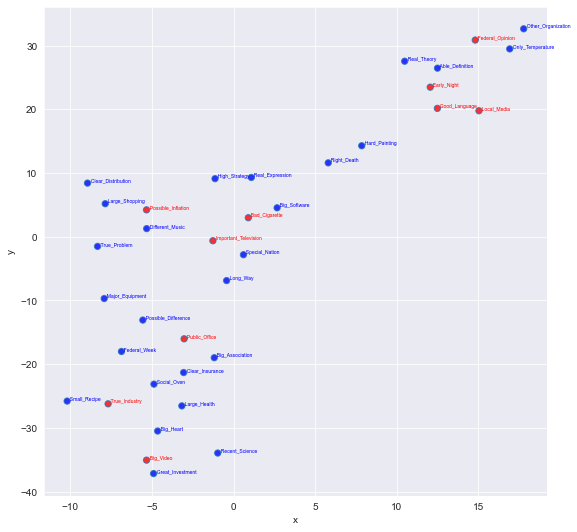

In [2]:
root_dir = "OUTPUT/PrecisionAtK"
create_directory_path_if_not_exists(root_dir)
file=open(f'{root_dir}/ranking.txt','w')
    
for seed in range(1, 2):
    
    game_objects, expected_rules = brute_generator.generate_without_interference(
        seed=SEED,
        tags=tags,
        game_objects_count=GAME_OBJECTS_COUNT,
        R_mn = RULES_COUNT,
        R_mx = RULES_COUNT,
        rule_parameters=rule_parameters,
        noise_cover=NOISE_COVER
    )   
            
    save_brute_generated_data(root_dir, seed, tags, rule_parameters, game_objects, expected_rules, NOISE_COVER)
    
    #precision_at_k_for_apriori()
    
    for i in expected_rules:
        print(f"{i.recommendation}, {i.strength(GAME_OBJECTS_COUNT):.4f} <---------- {i.premise}")
                        
    precision_at_k_to_size = []
    timer = Timer()
        
    for size in range(15, 16):    
        model = train_word2vec(game_objects, size=size, min_count=1, alpha=0.1,
                       min_alpha=0.001, epochs=100, seed=0, window=5, negative=5)
    
        word2vec_score, ranking = evaluate_normal_cumulative_gain(Ks, expected_rules, len(game_objects),
                                    lambda game_object, k: word2vec_for_game_object(game_object, k, model))
        
        
        for rules in ranking:
            for rule in rules:
                file.write(f"{rule}\n")
            file.write("\n")
        
        visualize_model(model, expected_rules, 30, 5)
        plt.savefig(f'OUTPUT/Word2VecVisualization/Word2VecVisualization_Objects_{GAME_OBJECTS_COUNT}_Rules_{RULES_COUNT}_NoiseCover_{NOISE_COVER}.png', dpi=500)

        
        timer.save_tick(f"{size}")
        precision_at_k_to_size.append(word2vec_score[Ks[2]])
        
        print("="*30)
        for r in ranking:
            print(r)
    
    print(precision_at_k_to_size)
    
    if len(precision_at_k_to_size) > 1:
        prepare_plot()
        plt.title("Precision at 10", color='white')
        plt.plot(precision_at_k_to_size)
        plt.show()    

file.close()

In [3]:
#show_time()